In [28]:
import pandas as pd
from pandas import DataFrame
from sqlalchemy.engine import create_engine
from sqlalchemy.engine import Engine, Connection


In [29]:
def trino_pandas_read(engine: Engine):
    engine = create_engine("trino://trino@localhost:8080")
    connection: Connection = engine.connect()
    return pd.read_sql("SELECT * FROM tpch.sf1.customer limit 10", connection)
   

In [30]:
df=trino_pandas_read(Engine)

/var/folders/wc/j2_n5ps16gvdkk14pm46chlm0000gn/T/ipykernel_48014/2530627395.py:2: SADeprecationWarning: The dbapi() classmethod on dialect classes has been renamed to import_dbapi().  Implement an import_dbapi() classmethod directly on class <class 'trino.sqlalchemy.dialect.TrinoDialect'> to remove this warning; the old .dbapi() classmethod may be maintained for backwards compatibility.
  engine = create_engine("trino://trino@localhost:8080")


In [31]:
def trino_sql(engine: Engine, sqlText):
    engine = create_engine("trino://trino@localhost:8080")
    connection: Connection = engine.connect()
    df = pd.read_sql(sqlText, connection)
    print(df)
    return df;

In [ ]:
data=trino_sql(Engine,"select name, count(1) as cnt from tpch.sf1.customer group by name");

/var/folders/wc/j2_n5ps16gvdkk14pm46chlm0000gn/T/ipykernel_48014/1432030827.py:2: SADeprecationWarning: The dbapi() classmethod on dialect classes has been renamed to import_dbapi().  Implement an import_dbapi() classmethod directly on class <class 'trino.sqlalchemy.dialect.TrinoDialect'> to remove this warning; the old .dbapi() classmethod may be maintained for backwards compatibility.
  engine = create_engine("trino://trino@localhost:8080")


                      name  cnt
0       Customer#000012817    1
1       Customer#000012828    1
2       Customer#000012839    1
3       Customer#000012840    1
4       Customer#000012876    1
...                    ...  ...
149995  Customer#000125208    1
149996  Customer#000125210    1
149997  Customer#000125217    1
149998  Customer#000125274    1
149999  Customer#000125281    1

[150000 rows x 2 columns]


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data['name']

0         Customer#000012817
1         Customer#000012828
2         Customer#000012839
3         Customer#000012840
4         Customer#000012876
                 ...        
149995    Customer#000125208
149996    Customer#000125210
149997    Customer#000125217
149998    Customer#000125274
149999    Customer#000125281
Name: name, Length: 150000, dtype: object

In [ ]:
data['cnt']

0         1
1         1
2         1
3         1
4         1
         ..
149995    1
149996    1
149997    1
149998    1
149999    1
Name: cnt, Length: 150000, dtype: int64

In [ ]:
df2=data.loc[:,['name',
                'cnt']]

In [ ]:
df2.tail

<bound method NDFrame.tail of                       name  cnt
0       Customer#000012817    1
1       Customer#000012828    1
2       Customer#000012839    1
3       Customer#000012840    1
4       Customer#000012876    1
...                    ...  ...
149995  Customer#000125208    1
149996  Customer#000125210    1
149997  Customer#000125217    1
149998  Customer#000125274    1
149999  Customer#000125281    1

[150000 rows x 2 columns]>

<Axes: >

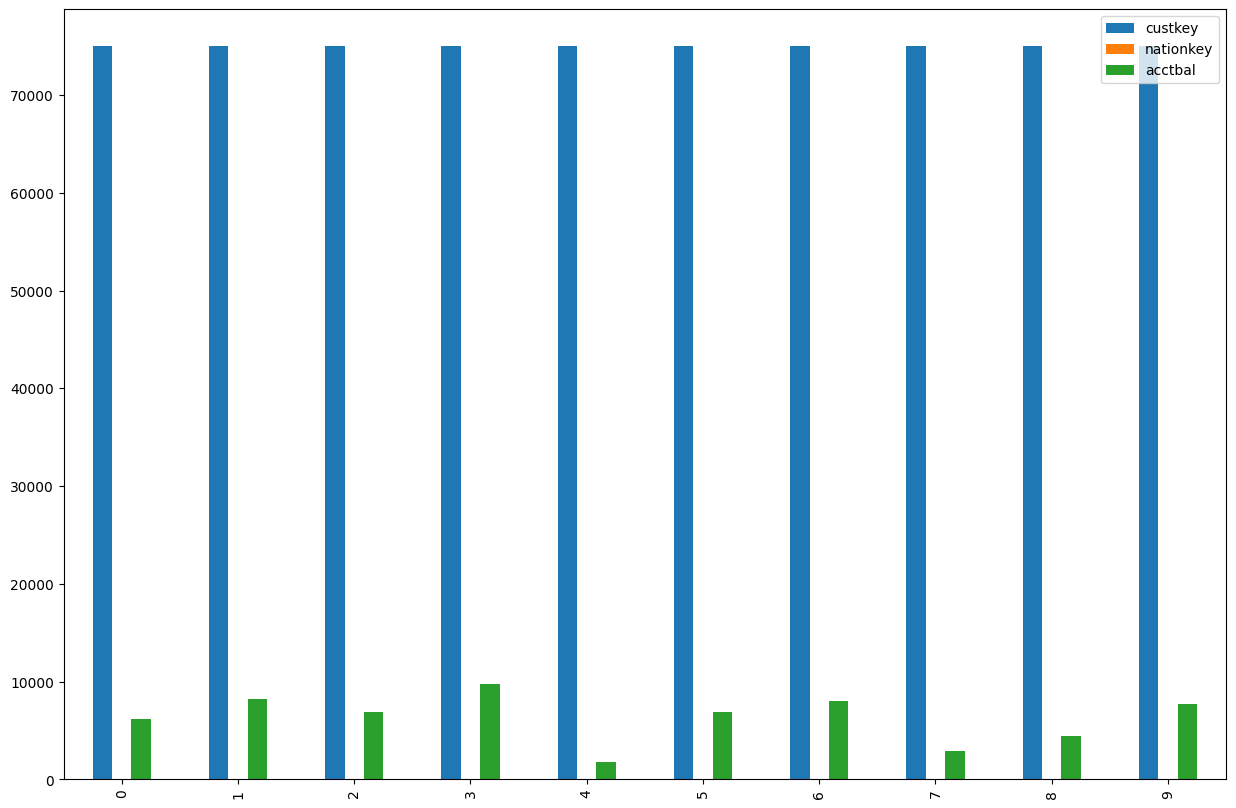

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind="bar",figsize=(15,10))